In [115]:
!rm -r /home/vamsi/cv/project/neww/Image-Super-Resolution-via-Iterative-Refinement/dataset/test_16_128


In [116]:
!python data/prepare_data.py --path test2/ --size 16,128 --out ./dataset/test

0/5 images processed 

In [117]:
!python infer.py -c config/sr_sr3_16_128t3.json

export CUDA_VISIBLE_DEVICES=0
24-11-30 05:23:57.036 - INFO:   name: sr_ffhq
  phase: val
  gpu_ids: [0]
  path:[
    log: experiments/sr_ffhq_241130_052357/logs
    tb_logger: experiments/sr_ffhq_241130_052357/tb_logger
    results: experiments/sr_ffhq_241130_052357/results
    checkpoint: experiments/sr_ffhq_241130_052357/checkpoint
    resume_state: checkpoint/I3540000_E696
    experiments_root: experiments/sr_ffhq_241130_052357
  ]
  datasets:[
    train:[
      name: FFHQ
      mode: HR
      dataroot: dataset/ffhq_16_128
      datatype: img
      l_resolution: 16
      r_resolution: 128
      batch_size: 4
      num_workers: 8
      use_shuffle: True
      data_len: -1
    ]
    val:[
      name: test
      mode: LRHR
      dataroot: dataset/test_16_128
      datatype: img
      l_resolution: 16
      r_resolution: 128
      data_len: 10
    ]
  ]
  model:[
    which_model_G: sr3
    finetune_norm: False
    unet:[
      in_channel: 6
      out_channel: 3
      inner_channel: 64
 

In [57]:
!rm -r es


In [119]:
import os
from shutil import copy2

main_dir = "./experiments" 
output_dir = "./es8"  

os.makedirs(output_dir, exist_ok=True)

latest_folder = max(
    [os.path.join(main_dir, d) for d in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, d))],
    key=os.path.getmtime
)

results_folder = os.path.join(latest_folder, "results")
print(results_folder)

if not os.path.exists(results_folder):
    print(f"No 'results' folder found in the latest folder: {latest_folder}")
else:
    image_extensions = {".png", ".jpg", ".jpeg", ".bmp", ".tiff"}  # Add more extensions if needed
    for root, _, files in os.walk(results_folder):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                src_path = os.path.join(root, file)
                dest_path = os.path.join(output_dir, file)
                copy2(src_path, dest_path)  # Copy the image to the output directory

    print(f"Images extracted from 'results' folder to: {output_dir}")


./experiments/sr_ffhq_241130_052357/results
Images extracted from 'results' folder to: ./es8


# 500 inference steps

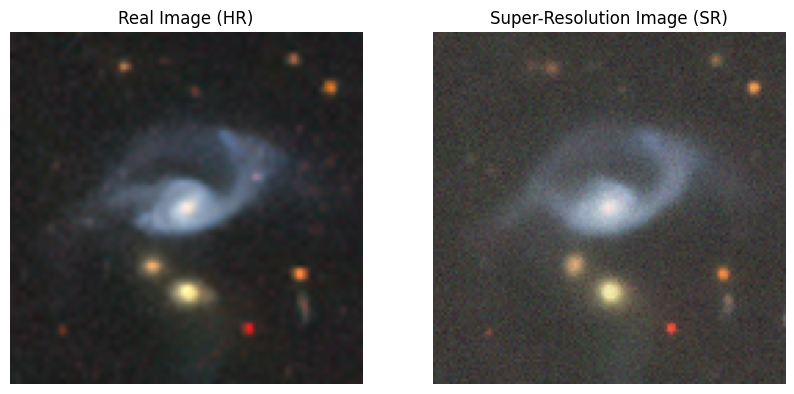

Mean Squared Error (MSE): 112.8739
Structural Similarity Index (SSIM): 0.5255
Frechet Inception Distance (FID): 1810.9460


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.io import imread
from sklearn.metrics import mean_squared_error
from scipy.linalg import sqrtm
from PIL import Image

folder_path = "./es4"  
real_image = os.path.join(folder_path, "0_2_hr.png")  
sr_image = os.path.join(folder_path, "0_2_sr.png")  

# Load images
real_img = imread(real_image)
sr_img = imread(sr_image)

if real_img.shape != sr_img.shape:
    sr_img = np.array(Image.fromarray(sr_img).resize(real_img.shape[1::-1]))

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(real_img)
plt.title("Real Image (HR)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sr_img)
plt.title("Super-Resolution Image (SR)")
plt.axis("off")
plt.show()

# Calculate MSE
mse_value = mean_squared_error(real_img.flatten(), sr_img.flatten())

# Calculate SSIM
ssim_value = ssim(real_img, sr_img, multichannel=True, win_size=3, channel_axis=-1)

# Calculate FID (uses feature vectors; simplified version)
def calculate_fid(img1, img2):
    # Flatten images for mean and covariance calculation
    img1 = img1.astype("float32").reshape(-1, 3)
    img2 = img2.astype("float32").reshape(-1, 3)
    
    # Calculate mean and covariance
    mu1, sigma1 = img1.mean(axis=0), np.cov(img1, rowvar=False)
    mu2, sigma2 = img2.mean(axis=0), np.cov(img2, rowvar=False)
    
    # Calculate squared difference of means
    mean_diff = np.sum((mu1 - mu2) ** 2)
    
    covmean, _ = sqrtm(sigma1.dot(sigma2), disp=False)
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    
    fid_value = mean_diff + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid_value

fid_value = calculate_fid(real_img, sr_img)

# Print Metrics
print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"Structural Similarity Index (SSIM): {ssim_value:.4f}")
print(f"Frechet Inception Distance (FID): {fid_value:.4f}")


# 2000 inference steps

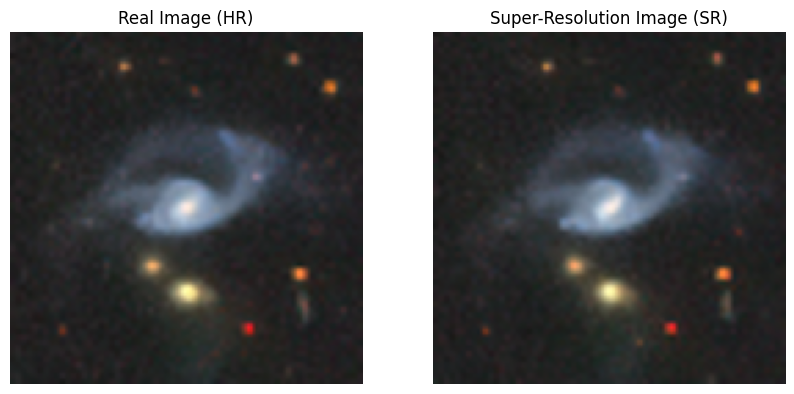

Mean Squared Error (MSE): 18.5761
Structural Similarity Index (SSIM): 0.8634
Frechet Inception Distance (FID): 0.1051


In [122]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.io import imread
from sklearn.metrics import mean_squared_error
from scipy.linalg import sqrtm
from PIL import Image

folder_path = "./es8"  
real_image = os.path.join(folder_path, "0_2_hr.png")  
sr_image = os.path.join(folder_path, "0_2_sr.png")  

# Load images
real_img = imread(real_image)
sr_img = imread(sr_image)

if real_img.shape != sr_img.shape:
    sr_img = np.array(Image.fromarray(sr_img).resize(real_img.shape[1::-1]))

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(real_img)
plt.title("Real Image (HR)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sr_img)
plt.title("Super-Resolution Image (SR)")
plt.axis("off")
plt.show()

# Calculate MSE
mse_value = mean_squared_error(real_img.flatten(), sr_img.flatten())

# Calculate SSIM
ssim_value = ssim(real_img, sr_img, multichannel=True, win_size=3, channel_axis=-1)

# Calculate FID (uses feature vectors; simplified version)
def calculate_fid(img1, img2):
    # Flatten images for mean and covariance calculation
    img1 = img1.astype("float32").reshape(-1, 3)
    img2 = img2.astype("float32").reshape(-1, 3)
    
    # Calculate mean and covariance
    mu1, sigma1 = img1.mean(axis=0), np.cov(img1, rowvar=False)
    mu2, sigma2 = img2.mean(axis=0), np.cov(img2, rowvar=False)
    
    # Calculate squared difference of means
    mean_diff = np.sum((mu1 - mu2) ** 2)
    
    # Calculate sqrt of product of covariance matrices
    covmean, _ = sqrtm(sigma1.dot(sigma2), disp=False)
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    
    fid_value = mean_diff + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid_value

fid_value = calculate_fid(real_img, sr_img)

# Print Metrics
print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"Structural Similarity Index (SSIM): {ssim_value:.4f}")
print(f"Frechet Inception Distance (FID): {fid_value:.4f}")


# 1000 inference steps 

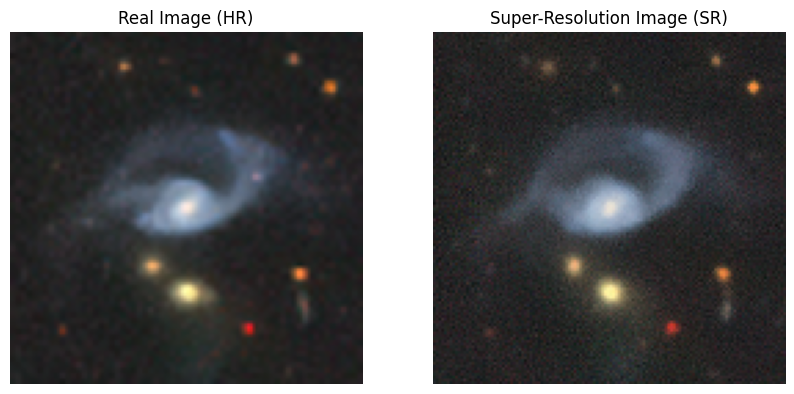

Mean Squared Error (MSE): 48.2941
Structural Similarity Index (SSIM): 0.6140
Frechet Inception Distance (FID): 28.4872


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.io import imread
from sklearn.metrics import mean_squared_error
from scipy.linalg import sqrtm
from PIL import Image

folder_path = "./es3"  
real_image = os.path.join(folder_path, "0_2_hr.png")  
sr_image = os.path.join(folder_path, "0_2_sr.png")  

# Load images
real_img = imread(real_image)
sr_img = imread(sr_image)

if real_img.shape != sr_img.shape:
    sr_img = np.array(Image.fromarray(sr_img).resize(real_img.shape[1::-1]))

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(real_img)
plt.title("Real Image (HR)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sr_img)
plt.title("Super-Resolution Image (SR)")
plt.axis("off")
plt.show()

# Calculate MSE
mse_value = mean_squared_error(real_img.flatten(), sr_img.flatten())

# Calculate SSIM
ssim_value = ssim(real_img, sr_img, multichannel=True, win_size=3, channel_axis=-1)

# Calculate FID (uses feature vectors; simplified version)
def calculate_fid(img1, img2):
    # Flatten images for mean and covariance calculation
    img1 = img1.astype("float32").reshape(-1, 3)
    img2 = img2.astype("float32").reshape(-1, 3)
    
    # Calculate mean and covariance
    mu1, sigma1 = img1.mean(axis=0), np.cov(img1, rowvar=False)
    mu2, sigma2 = img2.mean(axis=0), np.cov(img2, rowvar=False)
    
    # Calculate squared difference of means
    mean_diff = np.sum((mu1 - mu2) ** 2)
    
    # Calculate sqrt of product of covariance matrices
    covmean, _ = sqrtm(sigma1.dot(sigma2), disp=False)
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    
    fid_value = mean_diff + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid_value

fid_value = calculate_fid(real_img, sr_img)

# Print Metrics
print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"Structural Similarity Index (SSIM): {ssim_value:.4f}")
print(f"Frechet Inception Distance (FID): {fid_value:.4f}")


# 1000 steps + bilatral filter

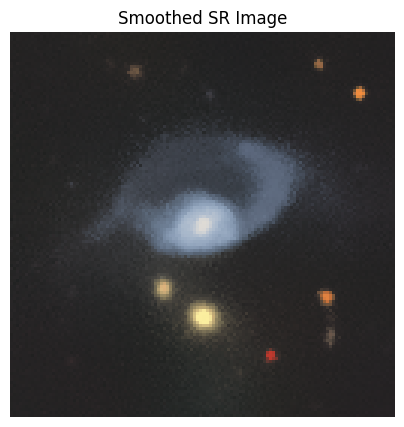

Mean Squared Error (MSE) after smoothing: 31.7469
Structural Similarity Index (SSIM) after smoothing: 0.8308
Frechet Inception Distance (FID) after smoothing: 25.7269


In [2]:
import cv2

# Apply bilateral filter to the SR image
smoothed_img = cv2.bilateralFilter(sr_img, d=40, sigmaColor=30, sigmaSpace=200)

# Display the smoothed image
plt.figure(figsize=(5, 5))
plt.imshow(smoothed_img)
plt.title("Smoothed SR Image")
plt.axis("off")
plt.show()

# Recalculate MSE
mse_smoothed = mean_squared_error(real_img.flatten(), smoothed_img.flatten())

# Recalculate SSIM
ssim_smoothed = ssim(real_img, smoothed_img, multichannel=True, win_size=3, channel_axis=-1)

# Recalculate FID
fid_smoothed = calculate_fid(real_img, smoothed_img)

# Print Metrics for the smoothed image
print(f"Mean Squared Error (MSE) after smoothing: {mse_smoothed:.4f}")
print(f"Structural Similarity Index (SSIM) after smoothing: {ssim_smoothed:.4f}")
print(f"Frechet Inception Distance (FID) after smoothing: {fid_smoothed:.4f}")


['0_3_sr.png', '0_4_hr.png', '0_2_hr.png', '0_3_hr.png', '0_2_inf.png', '0_2_sr.png', '0_1_inf.png', '0_1_sr.png', '0_4_sr_process.png', '0_1_hr.png', '0_2_sr_process.png', '0_4_sr.png', '0_3_sr_process.png', '0_3_inf.png', '0_4_inf.png', '0_1_sr_process.png']


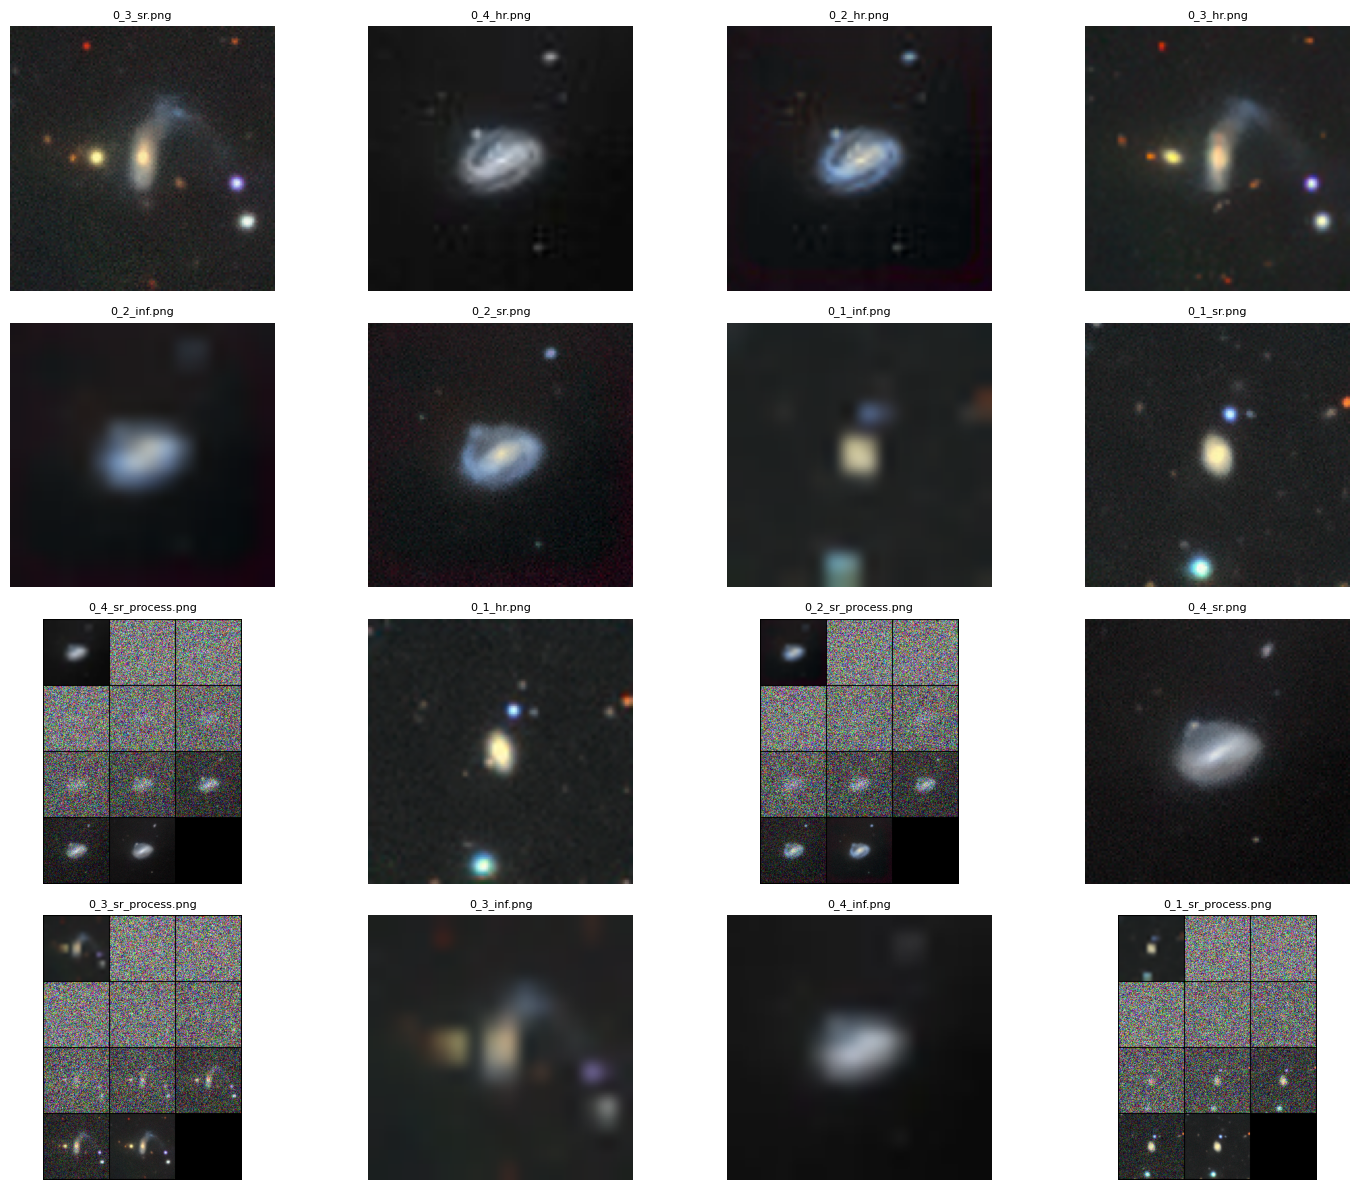

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Specify the folder path
folder_path = 'es3'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(image_files)
if image_files:
    num_images = len(image_files)
    cols = 4  
    rows = (num_images + cols - 1) // cols  

    plt.figure(figsize=(15, rows * 3))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(img_file, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images found in the folder.")


['0_1_inf.png', '0_1_sr.png', '0_1_hr.png', '0_1_sr_process.png']


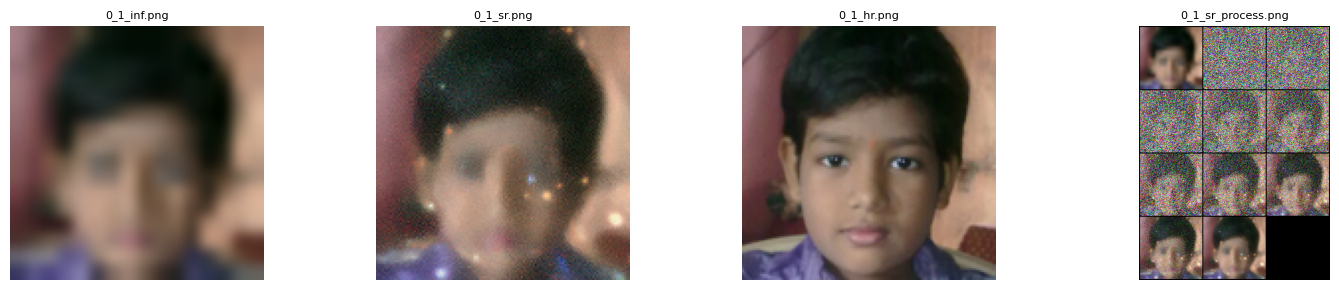

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

folder_path = 'es5'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(image_files)
if image_files:
    num_images = len(image_files)
    cols = 4 
    rows = (num_images + cols - 1) // cols  
    plt.figure(figsize=(15, rows * 3))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(img_file, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images found in the folder.")


['0_1_inf.png', '0_1_sr.png', '0_1_hr.png', '0_1_sr_process.png']


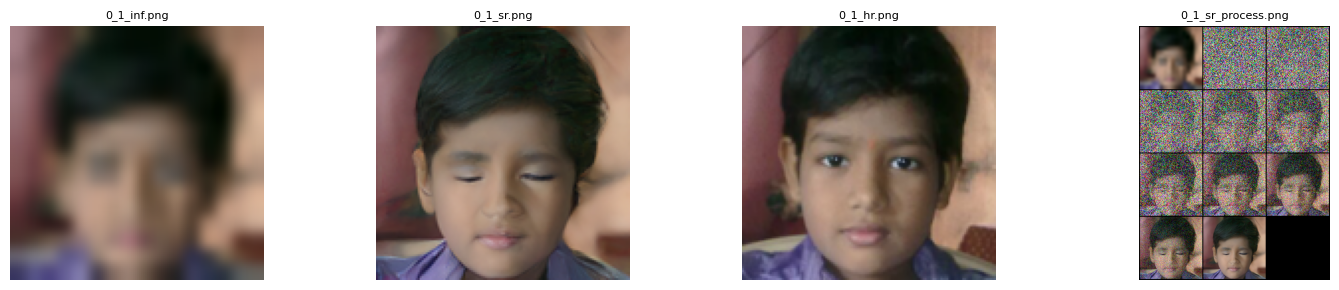

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

folder_path = 'es6'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(image_files)
if image_files:
    num_images = len(image_files)
    cols = 4  
    rows = (num_images + cols - 1) // cols  
    plt.figure(figsize=(15, rows * 3))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(img_file, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images found in the folder.")


['0_1_inf.png', '0_1_sr.png', '0_1_hr.png', '0_1_sr_process.png']


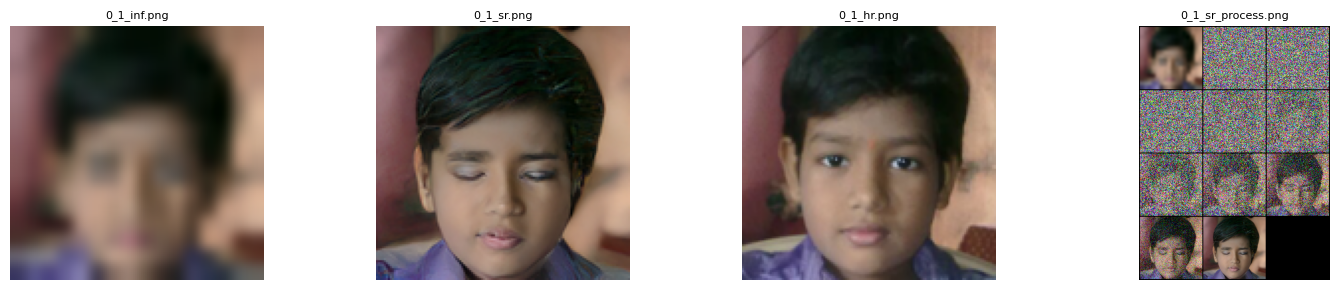

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

folder_path = 'es7'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(image_files)
if image_files:
    num_images = len(image_files)
    cols = 4 
    rows = (num_images + cols - 1) // cols 
    plt.figure(figsize=(15, rows * 3))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(img_file, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images found in the folder.")


['0_3_sr.png', '0_4_hr.png', '0_2_hr.png', '0_5_inf.png', '0_3_hr.png', '0_2_inf.png', '0_5_sr_process.png', '0_2_sr.png', '0_1_inf.png', '0_1_sr.png', '0_4_sr_process.png', '0_1_hr.png', '0_2_sr_process.png', '0_4_sr.png', '0_5_hr.png', '0_3_sr_process.png', '0_3_inf.png', '0_5_sr.png', '0_4_inf.png', '0_1_sr_process.png']


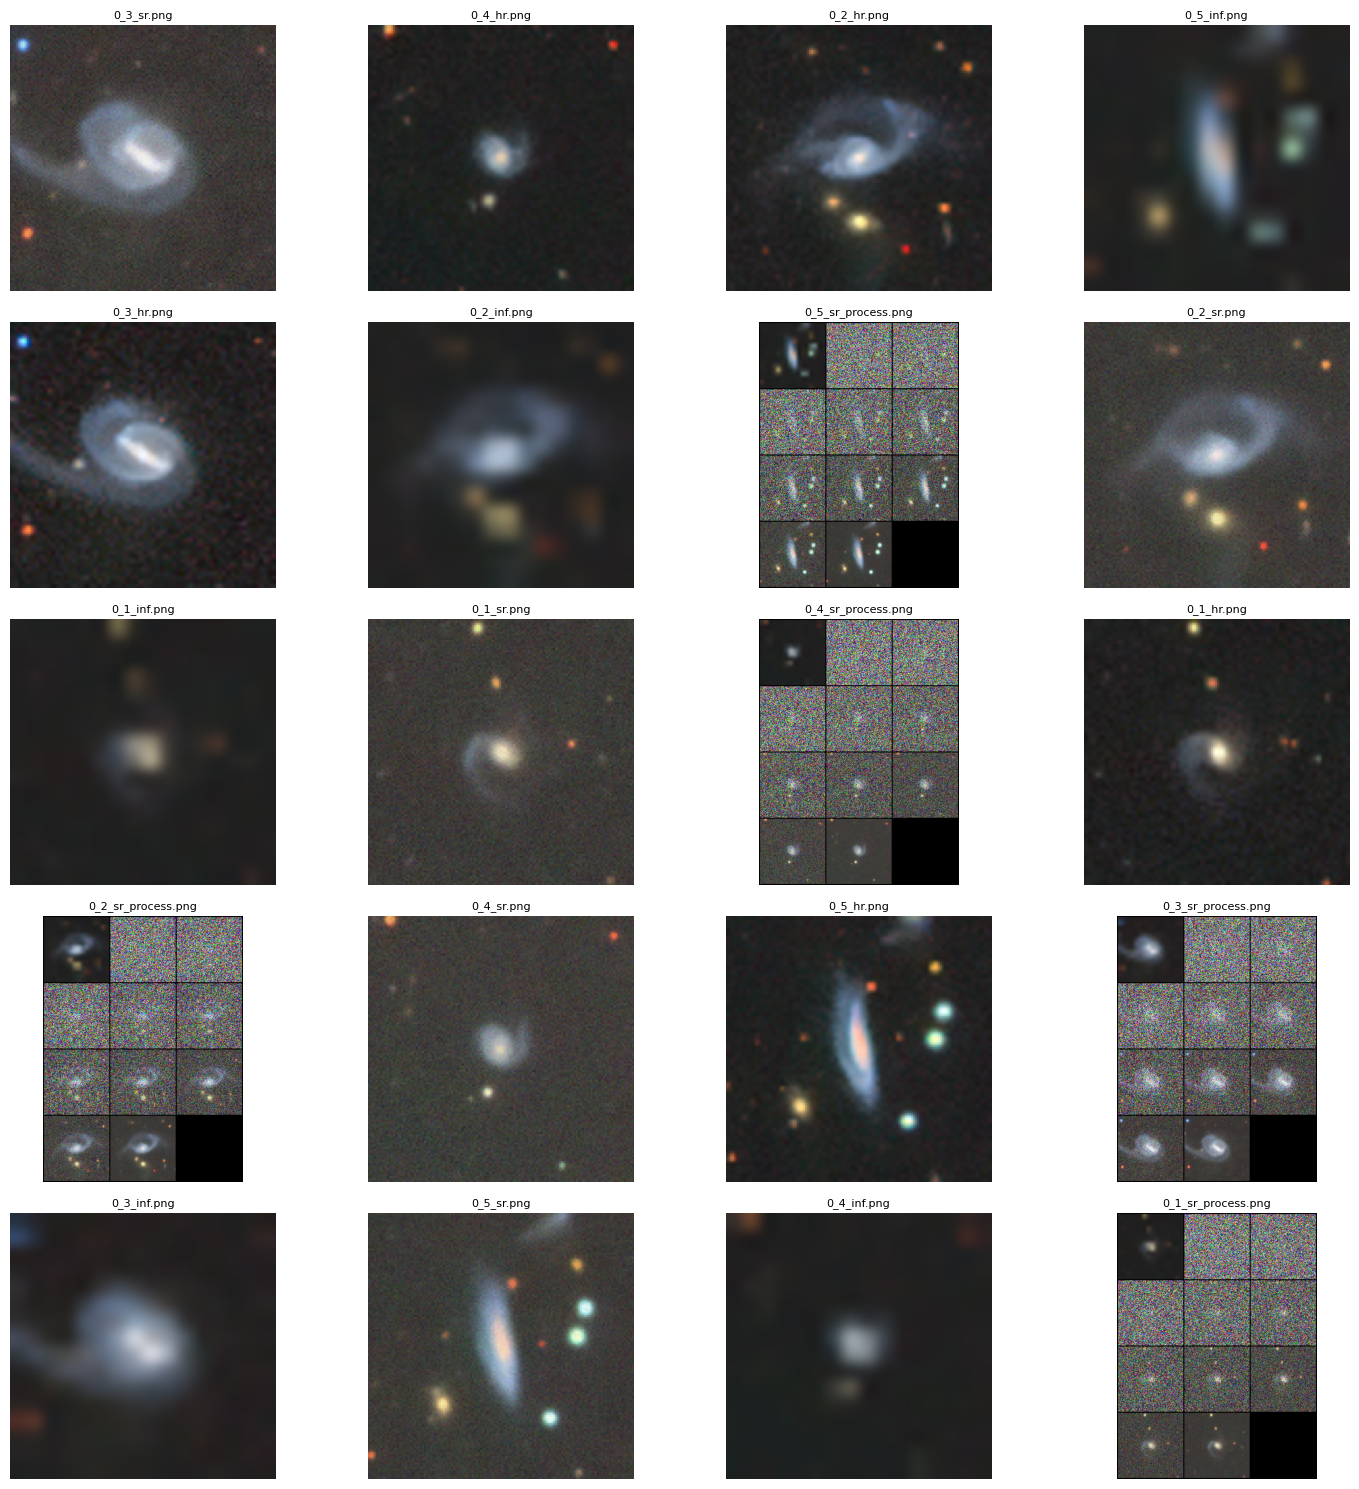

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

folder_path = 'es4'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(image_files)
if image_files:
    num_images = len(image_files)
    cols = 4  
    rows = (num_images + cols - 1) // cols  
    plt.figure(figsize=(15, rows * 3))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(img_file, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images found in the folder.")


['0_3_sr.png', '0_4_hr.png', '0_2_hr.png', '0_5_inf.png', '0_3_hr.png', '0_2_inf.png', '0_5_sr_process.png', '0_2_sr.png', '0_1_inf.png', '0_1_sr.png', '0_4_sr_process.png', '0_1_hr.png', '0_2_sr_process.png', '0_4_sr.png', '0_5_hr.png', '0_3_sr_process.png', '0_3_inf.png', '0_5_sr.png', '0_4_inf.png', '0_1_sr_process.png']


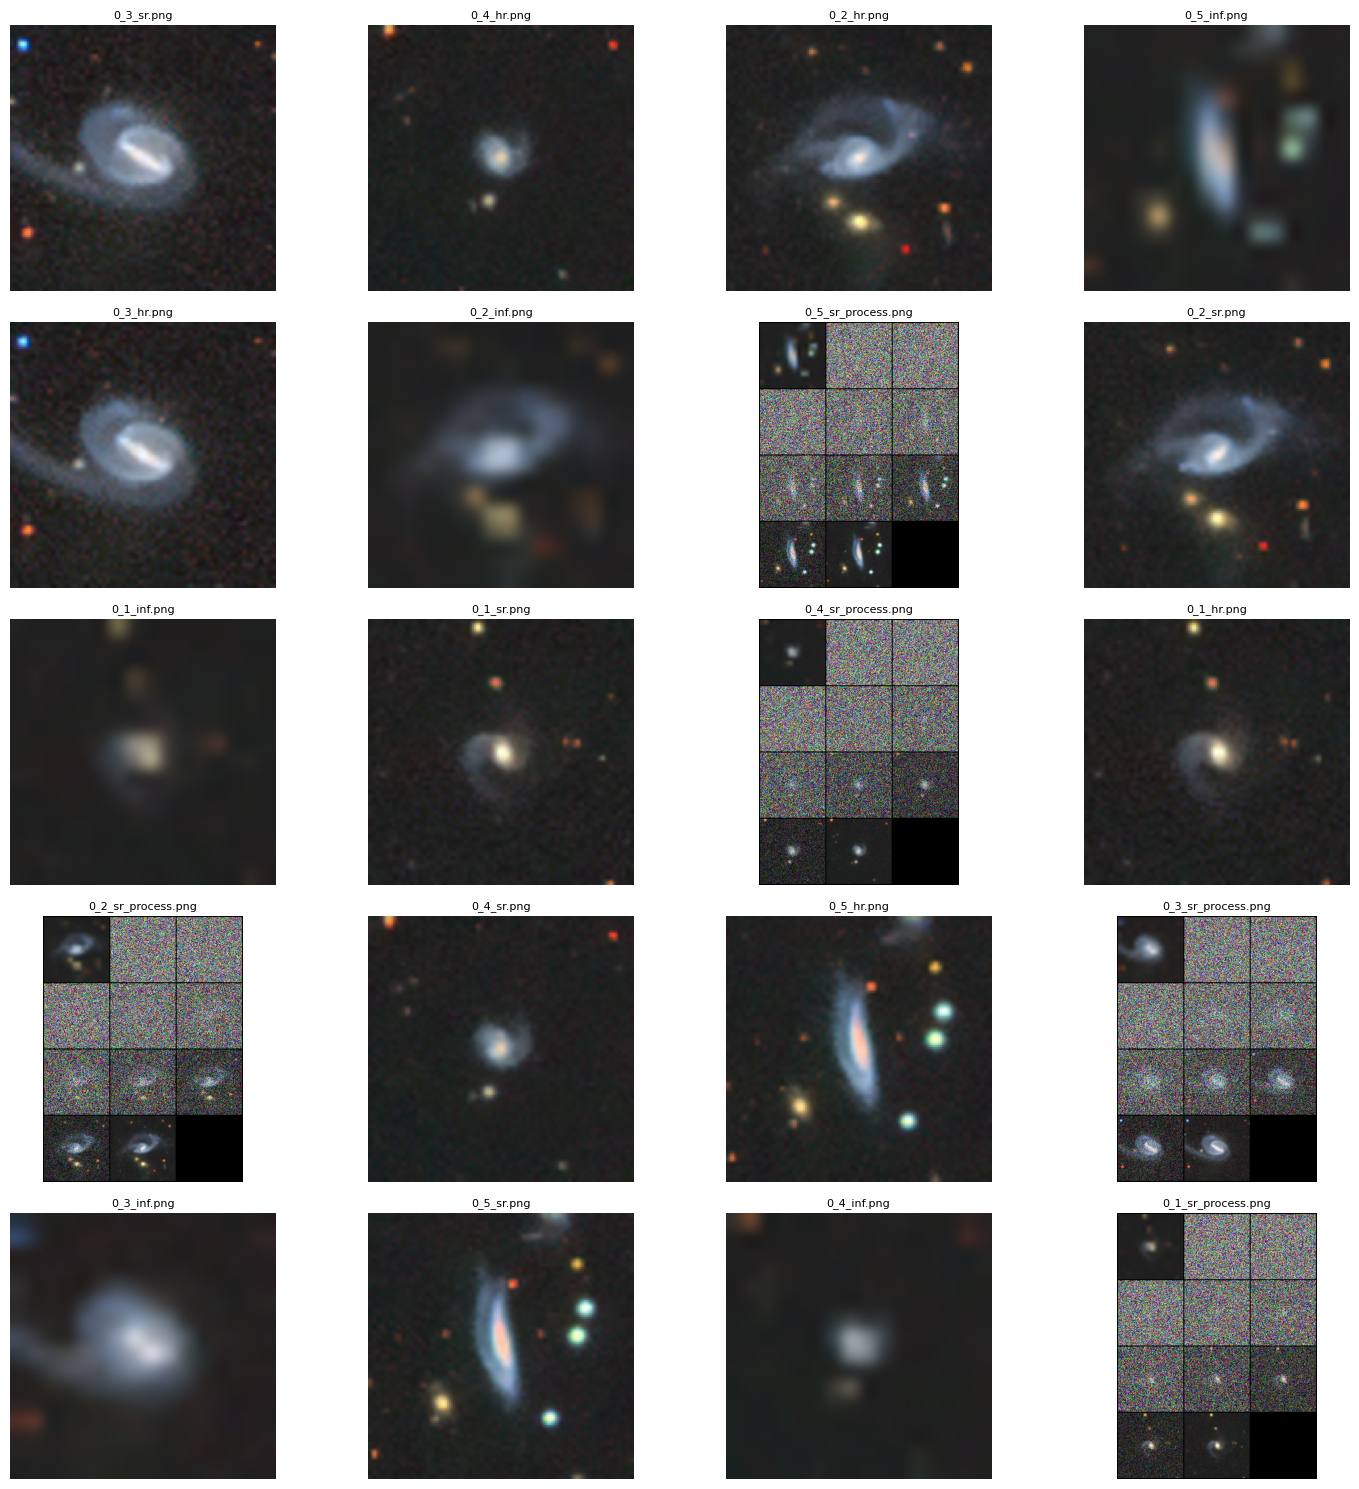

In [120]:
import os
import cv2
import matplotlib.pyplot as plt

folder_path = 'es8'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(image_files)
if image_files:
    num_images = len(image_files)
    cols = 4  
    rows = (num_images + cols - 1) // cols  
    plt.figure(figsize=(15, rows * 3))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(img_file, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images found in the folder.")
